### Woman and Man wage comparison
#### in London and in UK

In [9]:
import pandas as pd
import os

In [10]:
#Import data for London and UK
london = pd.read_excel(os.path.abspath('gender-pay-gap.xls'), sheetname = 'London')
uk = pd.read_excel(os.path.abspath('gender-pay-gap.xls'), sheetname = 'Uk')

In [11]:
#Concatenate London and UK dataframe
total = pd.concat([london, uk])
total.tail(5)

,Year,Location,Gender,Type,Hourly Rate (Ł)
127,2014,UK,Female,Part-time,11.17
128,2015,UK,Female,Part-time,11.14
129,2016,UK,Female,Part-time,11.67
130,2017,UK,Female,Part-time,11.99
131,2018 (p),UK,Female,Part-time,12.45


In [12]:
#Basic information about the new database
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 131
Data columns (total 5 columns):
Year               264 non-null object
Location           264 non-null object
Gender             264 non-null object
Type               264 non-null object
Hourly Rate (Ł)    264 non-null float64
dtypes: float64(1), object(4)
memory usage: 12.4+ KB


In [13]:
#Shape (rows, columns) of total dataframe
total.shape

(264, 5)

In [14]:
#Detect missing elements
total.isnull().any()

Year               False
Location           False
Gender             False
Type               False
Hourly Rate (Ł)    False
dtype: bool

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Replace of 2018(p) with 2018 in year column
total = total.replace('2018 (p)', 2018)
total.tail(5)

,Year,Location,Gender,Type,Hourly Rate (Ł)
127,2014,UK,Female,Part-time,11.17
128,2015,UK,Female,Part-time,11.14
129,2016,UK,Female,Part-time,11.67
130,2017,UK,Female,Part-time,11.99
131,2018,UK,Female,Part-time,12.45


In [17]:
import seaborn as sns

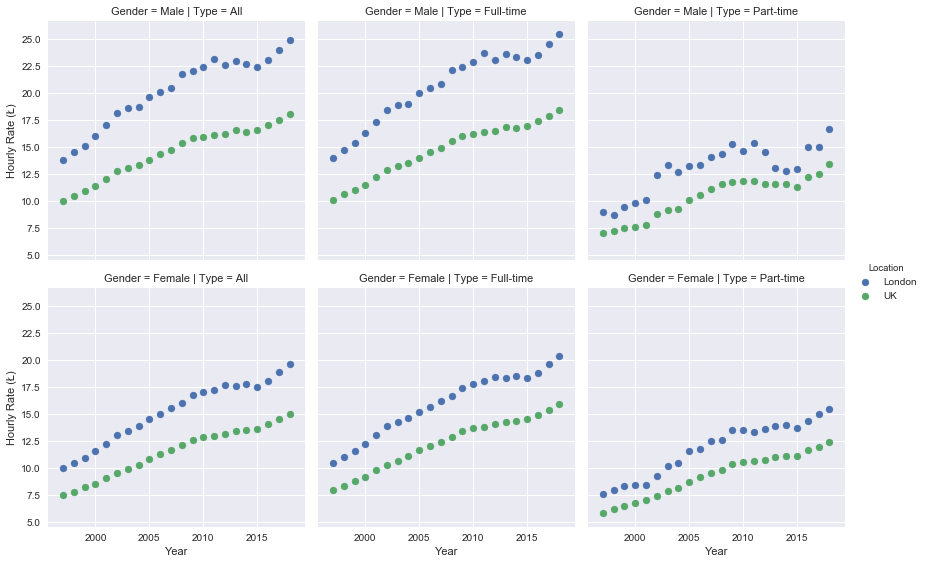

In [18]:
# Visualization of hourly rates in London and in the UK (categorization by gender (row), by type (column))
plot1 = sns.FacetGrid(data = total, col = 'Type', hue = 'Location', row = 'Gender', size = 4)
plot1.map(plt.scatter, 'Year', 'Hourly Rate (Ł)')
plot1.add_legend()


In [19]:
# Filtering to female wages
woman = total[total['Gender'] == 'Female']
woman.head(5)

,Year,Location,Gender,Type,Hourly Rate (Ł)
22,1997,London,Female,All,10.03
23,1998,London,Female,All,10.48
24,1999,London,Female,All,10.98
25,2000,London,Female,All,11.57
26,2001,London,Female,All,12.25


In [20]:
#Filtering to location - London
womanl = woman[woman['Location'] == 'London']
womanl.head(5)

,Year,Location,Gender,Type,Hourly Rate (Ł)
22,1997,London,Female,All,10.03
23,1998,London,Female,All,10.48
24,1999,London,Female,All,10.98
25,2000,London,Female,All,11.57
26,2001,London,Female,All,12.25


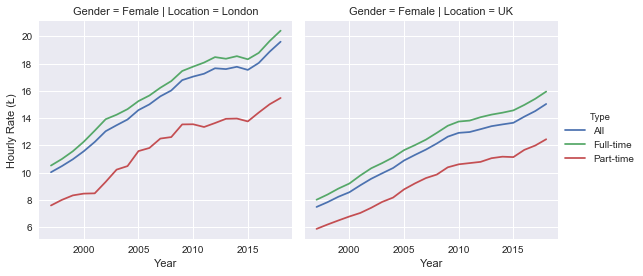

In [21]:
# Female hourly rate comparison by location and by work type
plot2 = sns.FacetGrid(data = woman, col = 'Location', hue = 'Type', row = 'Gender', size = 4)
plot2.map(plt.plot, 'Year', 'Hourly Rate (Ł)')
plot2.add_legend()

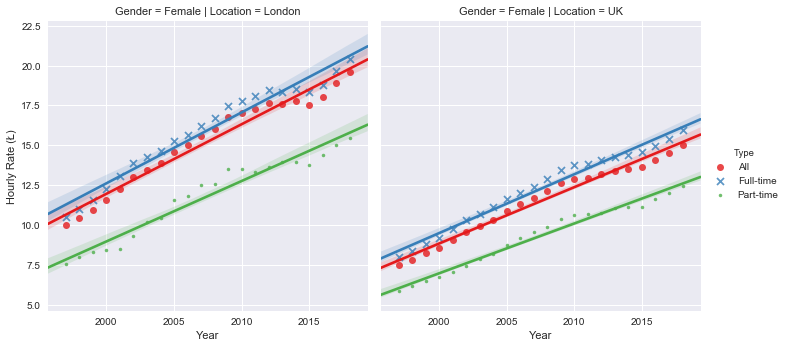

In [22]:
# Female hourly rate comparison and trend line by location and by work type
ax = sns.lmplot(x="Year", y= 'Hourly Rate (Ł)' , hue = 'Type', data= woman, row = 'Gender', 
                col = 'Location', palette = 'Set1', markers = ['o', 'x', '.'])

In [23]:
# Import of living_wage excel file
liv_wage = pd.read_excel(os.path.abspath('living_wage.xlsx'), sheetname = 'Mod')
liv_wage.head(3)

,Year,London living wage,UK living wage,National minimum
0,2004,6.4750,NaN,4.7625
1,2005,6.6500,NaN,5.0000
2,2006,6.9625,NaN,5.2750


In [24]:
# 3 head row of total dataframe
total.head(3)

,Year,Location,Gender,Type,Hourly Rate (Ł)
0,1997,London,Male,All,13.84
1,1998,London,Male,All,14.54
2,1999,London,Male,All,15.14


In [25]:
# 3 head row of liv_wage dataframe
liv_wage.head(3)

,Year,London living wage,UK living wage,National minimum
0,2004,6.4750,NaN,4.7625
1,2005,6.6500,NaN,5.0000
2,2006,6.9625,NaN,5.2750


In [26]:
total = total.merge(liv_wage, on = 'Year', how = 'left')
total.head(3)

,Year,Location,Gender,Type,Hourly Rate (Ł),London living wage,UK living wage,National minimum
0,1997,London,Male,All,13.84,NaN,NaN,NaN
1,1998,London,Male,All,14.54,NaN,NaN,NaN
2,1999,London,Male,All,15.14,NaN,NaN,NaN


In [27]:
total_all_w_l = total[total['Type'] == 'All']
total_all_w_l = total_all_w_l[total_all_w_l['Gender'] == 'Female']
total_all_w_l = total_all_w_l[total_all_w_l['Location'] == 'London']
total_all_w_l.tail(3)

,Year,Location,Gender,Type,Hourly Rate (Ł),London living wage,UK living wage,National minimum
41,2016,London,Female,All,18.05,9.6625,8.4000,7.0750
42,2017,London,Female,All,18.88,10.0875,8.6750,7.4250
43,2018,London,Female,All,19.61,10.4625,8.9375,7.7475


In [28]:
total_all_w_l['Gender'].unique()

array(['Female'], dtype=object)

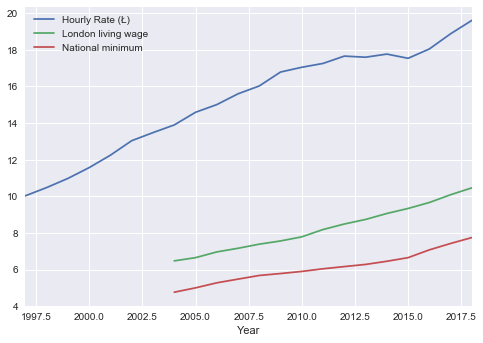

In [29]:
total_all_w_l.plot(x="Year", y=["Hourly Rate (Ł)", "London living wage", 'National minimum'], kind="line")


In [30]:
total_all_l = total[total['Type'] == 'All']
total_all_l = total_all_l[total_all_l['Location'] == 'London']
del total_all_l['UK living wage']
total_all_l.head(3)

,Year,Location,Gender,Type,Hourly Rate (Ł),London living wage,National minimum
0,1997,London,Male,All,13.84,NaN,NaN
1,1998,London,Male,All,14.54,NaN,NaN
2,1999,London,Male,All,15.14,NaN,NaN


In [31]:
total_w = total[total['Gender'] == 'Female']
total_w_london = total_w[total_w['Location'] == 'London']
total_w_uk = total_w[total_w['Location'] == 'UK']
total_w_london.head(3)

,Year,Location,Gender,Type,Hourly Rate (Ł),London living wage,UK living wage,National minimum
22,1997,London,Female,All,10.03,NaN,NaN,NaN
23,1998,London,Female,All,10.48,NaN,NaN,NaN
24,1999,London,Female,All,10.98,NaN,NaN,NaN


In [32]:
total_m = total[total['Gender'] == 'Male']
total_m_london = total_m[total_m['Location'] == 'London']
total_m_uk = total_m[total_m['Location'] == 'UK']
total_m_london.head(3)

,Year,Location,Gender,Type,Hourly Rate (Ł),London living wage,UK living wage,National minimum
0,1997,London,Male,All,13.84,NaN,NaN,NaN
1,1998,London,Male,All,14.54,NaN,NaN,NaN
2,1999,London,Male,All,15.14,NaN,NaN,NaN


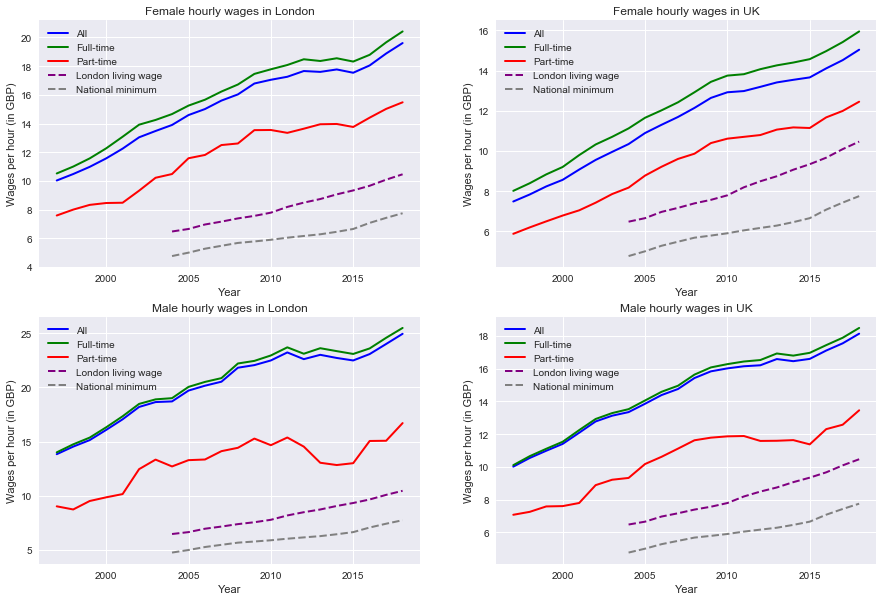

In [33]:
fig, axes = plt.subplots(2,2, figsize = (15, 10))

axes[0,0].plot(total_w_london[total_w_london['Type'] == 'All']['Year'], total_w_london[total_w_london['Type'] == 'All']['Hourly Rate (Ł)'], color = 'blue', linewidth = 2.00)
axes[0,0].plot(total_w_london[total_w_london['Type'] == 'Full-time']['Year'], total_w_london[total_w_london['Type'] == 'Full-time']['Hourly Rate (Ł)'], color = 'green', linewidth = 2.00)
axes[0,0].plot(total_w_london[total_w_london['Type'] == 'Part-time']['Year'], total_w_london[total_w_london['Type'] == 'Part-time']['Hourly Rate (Ł)'], color = 'red', linewidth = 2.00)
axes[0,0].plot(total_w_london[total_w_london['Type'] == 'All']['Year'], total_w_london[total_w_london['Type'] == 'All']['London living wage'], color = 'purple', linewidth = 2.00, linestyle = '--')
axes[0,0].plot(total_w_london[total_w_london['Type'] == 'All']['Year'], total_w_london[total_w_london['Type'] == 'All']['National minimum'], color = 'grey', linewidth = 2.00, linestyle = '--')

axes[0,1].plot(total_w_uk[total_w_uk['Type'] == 'All']['Year'], total_w_uk[total_w_uk['Type'] == 'All']['Hourly Rate (Ł)'], color = 'blue', linewidth = 2.00)
axes[0,1].plot(total_w_uk[total_w_uk['Type'] == 'Full-time']['Year'], total_w_uk[total_w_uk['Type'] == 'Full-time']['Hourly Rate (Ł)'], color = 'green', linewidth = 2.00)
axes[0,1].plot(total_w_uk[total_w_uk['Type'] == 'Part-time']['Year'], total_w_uk[total_w_uk['Type'] == 'Part-time']['Hourly Rate (Ł)'], color = 'red', linewidth = 2.00)
axes[0,1].plot(total_w_uk[total_w_uk['Type'] == 'All']['Year'], total_w_uk[total_w_uk['Type'] == 'All']['London living wage'], color = 'purple', linewidth = 2.00, linestyle = '--')
axes[0,1].plot(total_w_uk[total_w_uk['Type'] == 'All']['Year'], total_w_uk[total_w_uk['Type'] == 'All']['National minimum'], color = 'grey', linewidth = 2.00, linestyle = '--')

axes[1,0].plot(total_m_london[total_m_london['Type'] == 'All']['Year'], total_m_london[total_m_london['Type'] == 'All']['Hourly Rate (Ł)'], color = 'blue', linewidth = 2.00)
axes[1,0].plot(total_m_london[total_m_london['Type'] == 'Full-time']['Year'], total_m_london[total_m_london['Type'] == 'Full-time']['Hourly Rate (Ł)'], color = 'green', linewidth = 2.00)
axes[1,0].plot(total_m_london[total_m_london['Type'] == 'Part-time']['Year'], total_m_london[total_m_london['Type'] == 'Part-time']['Hourly Rate (Ł)'], color = 'red', linewidth = 2.00)
axes[1,0].plot(total_m_london[total_m_london['Type'] == 'All']['Year'], total_m_london[total_m_london['Type'] == 'All']['London living wage'], color = 'purple', linewidth = 2.00, linestyle = '--')
axes[1,0].plot(total_m_london[total_m_london['Type'] == 'All']['Year'], total_m_london[total_m_london['Type'] == 'All']['National minimum'], color = 'grey', linewidth = 2.00, linestyle = '--')

axes[1,1].plot(total_m_uk[total_m_uk['Type'] == 'All']['Year'], total_m_uk[total_m_uk['Type'] == 'All']['Hourly Rate (Ł)'], color = 'blue', linewidth = 2.00)
axes[1,1].plot(total_m_uk[total_m_uk['Type'] == 'Full-time']['Year'], total_m_uk[total_m_uk['Type'] == 'Full-time']['Hourly Rate (Ł)'], color = 'green', linewidth = 2.00)
axes[1,1].plot(total_m_uk[total_m_uk['Type'] == 'Part-time']['Year'], total_m_uk[total_m_uk['Type'] == 'Part-time']['Hourly Rate (Ł)'], color = 'red', linewidth = 2.00)
axes[1,1].plot(total_m_uk[total_m_uk['Type'] == 'All']['Year'], total_m_uk[total_m_uk['Type'] == 'All']['London living wage'], color = 'purple', linewidth = 2.00, linestyle = '--')
axes[1,1].plot(total_m_uk[total_m_uk['Type'] == 'All']['Year'], total_m_uk[total_m_uk['Type'] == 'All']['National minimum'], color = 'grey', linewidth = 2.00, linestyle = '--')

legend = ['All', 'Full-time', 'Part-time', 'London living wage', 'National minimum']
title = ['Female hourly wages in London', 'Female hourly wages in UK', 'Male hourly wages in London', 'Male hourly wages in UK']
xlabel = 'Year'
ylabel = 'Wages per hour (in GBP)'
title_index = 0
for i in range (0,2):
    for j in range (0,2):
        axes[i,j].legend(legend)
        axes[i,j].set_xlabel(xlabel)
        axes[i,j].set_ylabel(ylabel)
        axes[i,j].set_title(title[title_index])
        title_index = title_index + 1


